### Post Modeling Activities - Assignment
#### by Gaurav Singh (grv08singh@gmail.com)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

import warnings as wr
wr.filterwarnings('ignore')

print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

TensorFlow Version: 2.20.0
GPU Available: []


#### Problem Statement:
**Fashion MNIST** is a dataset of Zalando's article images, consisting of **60,000 training** examples and **10,000 test** examples. Each example is a **28x28 grayscale image**, associated with a label from **10 classes**. The task is to classify these images into an apparel category amongst 10 categories on which the dataset is benchmarked.

#### Objectives:

##### Data Preparation and Visualization:
* **Load** the `Fashion MNIST` dataset.

In [2]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

* **Visualize** different samples from the dataset.

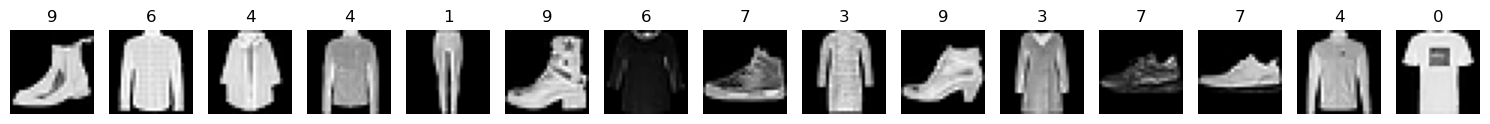

In [4]:
n = 15
idx = np.random.randint(1,X_train.shape[0],n)
fig,ax = plt.subplots(1,n,figsize=(15,2))
for i,j in enumerate(idx):
    ax[i].imshow(X_train[j],cmap='gray')
    ax[i].set_title(y_train[j])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

* **Normalize** the `pixel values` of the images to be between 0 and 1 for better model performance.

In [5]:
X_train_norm = X_train/255
X_test_norm = X_test/255

* **Convert** the output labels to `categorical format` for classification.

In [6]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [7]:
X_train_norm.shape

(60000, 28, 28)

##### Model Building and Training: 
* Construct a Neural Network using **TensorFlow** and **Keras**
* The model should consist of multiple `dense layers` with a significant number of `neurons`.
* Utilize `ReLU` activation for **hidden layers** and `softmax` activation for the **output layer**.

In [8]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))




model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 245,514 (959.04 KB)

 Trainable params: 243,594 (951.54 KB)

 Non-trainable params: 1,920 (7.50 KB)

* **Train** the model on the prepared dataset.
* Implement **callbacks**, particularly **TensorBoard**, to visualize the training process.

In [9]:
tensorboard_callback = TensorBoard(
    log_dir="logs/",
    histogram_freq = 1, #one histogram every epoch
    write_graph = True,
    update_freq = 'epoch'
)

early_stopping_callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights = True,
    verbose = 1
)

lr_reduce_callback = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.5,
    patience = 10,
    min_lr = 1e-5,
    verbose = 1,
)

callbacks = [tensorboard_callback, early_stopping_callback, lr_reduce_callback]

In [10]:
history = model.fit(
    x = X_train_norm,
    y = y_train_cat,
    epochs = 100,
    validation_data = (X_test_norm, y_test_cat),
    callbacks = callbacks
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.8163 - loss: 0.5088 - val_accuracy: 0.7901 - val_loss: 0.5412 - learning_rate: 0.0010
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8694 - loss: 0.3625 - val_accuracy: 0.8512 - val_loss: 0.4134 - learning_rate: 0.0010
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8825 - loss: 0.3231 - val_accuracy: 0.8507 - val_loss: 0.3844 - learning_rate: 0.0010
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8918 - loss: 0.2938 - val_accuracy: 0.8737 - val_loss: 0.3428 - learning_rate: 0.0010
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9021 - loss: 0.2685 - val_accuracy: 0.8901 - val_loss: 0.3018 - learning_rate: 0.0010
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9094 - loss: 0.2472 - val_accuracy: 0.8818 - val_loss: 0.3312 - learning_rate: 0.0010
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step -

##### Model Evaluation and Analysis:
* **Evaluate** the model's `performance` using a validation set.

In [11]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

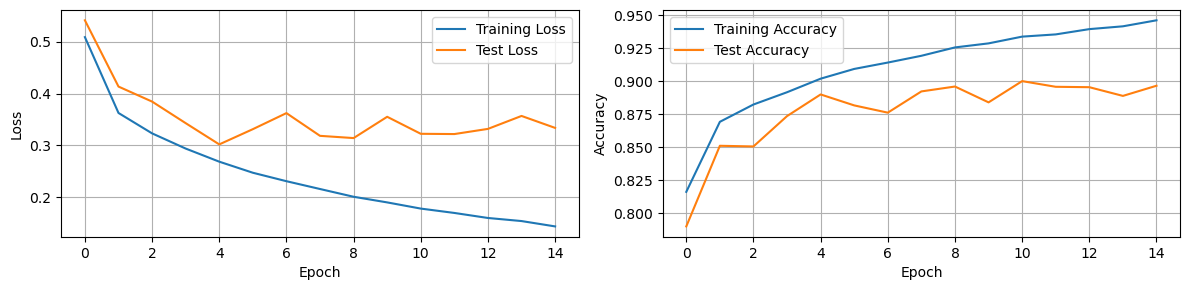

In [12]:
fig,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Test Loss')
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(train_accuracy, label='Training Accuracy')
ax[1].plot(val_accuracy, label='Test Accuracy')
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

* **Analyze** the `training process` with the help of **TensorBoard**.

In [16]:
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs/

* **Save** the `trained model`, including its `architecture` and `learned weights`.

In [14]:
model.save("my_model.keras")
model.save_weights("my_model.weights.h5")
with open("my_model_architecture.json", 'w') as f:
    f.write(model.to_json())